<a href="https://colab.research.google.com/github/wilmi94/MasterThesis-AE/blob/main/notebooks/sdo_cli_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SDO-CLI by Marius Giger
see: https://github.com/i4Ds/sdo-cli/tree/main

underlying dataset:

*Ahmadzadeh, Azim, Dustin J. Kempton, and Rafal A. Angryk. "A Curated Image Parameter Data Set from the Solar Dynamics Observatory Mission." The Astrophysical Journal Supplement Series 243.1 (2019): 18.*

In [50]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [1]:
%%capture
pip install -U sdo-cli

In [3]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Change present working directory
%cd /content/drive/MyDrive/Academia/MSc. Aerospace Engineering - FH Wiener Neustadt/4. Master Thesis/03-Work/sdo-cli

/content/drive/MyDrive/Academia/MSc. Aerospace Engineering - FH Wiener Neustadt/4. Master Thesis/03-Work/sdo-cli


## sdo-cli functions

In [5]:
!sdo-cli data --help

2023-07-17 14:25:29,842 numexpr.utils    INFO NumExpr defaulting to 2 threads.
Usage: sdo-cli data [OPTIONS] COMMAND [ARGS]...

Options:
  --help  Show this message and exit.

Commands:
  download  Loads a set of SDO images between
            start and end from the Georgia State
            University Data Lab API
  patch     Generates patches from a set of images
  resize    Generates a set of resized images


**Download images from the Curated Image Parameter Dataset:**

In [10]:
!sdo-cli data download --path='./data/aia_171_2012' --start='2012-03-07T00:02:00' --end='2012-03-07T00:40:00' --freq='6min' --wavelength='171'

2023-07-17 14:28:05,470 numexpr.utils    INFO NumExpr defaulting to 2 threads.
2023-07-17 14:28:08,417 sdo.cli          INFO Starting to download images...
2023-07-17 14:28:08,427 sdo.cli          INFO loading data for 7 images between 2012-03-07 00:02:00 and 2012-03-07 00:40:00 for wavelengths ('171',)
100% 7/7 [00:03<00:00,  2.08it/s]


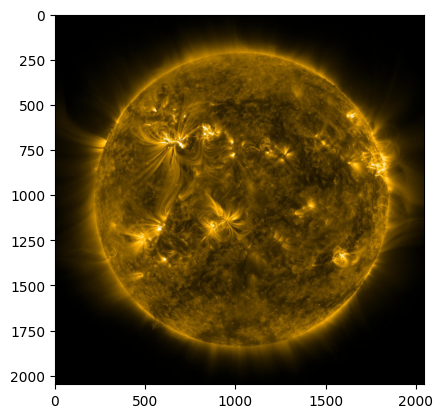

In [54]:
data_dir = "./data/aia_171_2012"
aia_wave = 171
images = list(Path(data_dir).rglob(f'*__{aia_wave}.jpeg'))
img_path = images[0]

src_img = Image.open(img_path)
plt.imshow(np.asarray(src_img))

**Resize images:**

In [12]:
#!sdo-cli data resize --help

In [13]:
!sdo-cli data resize --path='./data/aia_171_2012' --targetpath='./data/aia_171_2012_256' --wavelength='171' --size=256

2023-07-17 14:28:57,070 numexpr.utils    INFO NumExpr defaulting to 2 threads.
2023-07-17 14:28:59,499 sdo.cli          INFO Starting to generate resized images...
2023-07-17 14:28:59,505 sdo.cli          INFO converting 7 images


**Patch images:**

In [14]:
!sdo-cli data patch --path='./data/aia_171_2012_256' --targetpath='./data/aia_171_2012_256_patches' --wavelength='171' --size=32

2023-07-17 14:29:01,819 numexpr.utils    INFO NumExpr defaulting to 2 threads.
2023-07-17 14:29:05,533 sdo.cli          INFO Starting to generate patches...
2023-07-17 14:29:05,538 sdo.cli          INFO converting 7 images


In [47]:
!sdo-cli data patch --help

2023-07-17 15:01:31,052 numexpr.utils    INFO NumExpr defaulting to 2 threads.
Usage: sdo-cli data patch [OPTIONS]

  Loads a set of SDO images between start and end
  from the Georgia State University Data Lab API.

Options:
  --path DIRECTORY
  --targetpath DIRECTORY
  --size INTEGER
  --max-patches INTEGER
  --wavelength TEXT       Allows to filter the
                          files by wavelength. One
                          of ['94', '131', '171',
                          '193', '211', '304',
                          '335', '1600', '1700']
  --crop-size INTEGER     allows cropping the
                          input image by crop size
                          on each side
  --help                  Show this message and
                          exit.


## Loading Events from HEK

event-type =
- AR = 'ar'  # Active Region
- CH = 'ch'  # Coronal Hole
- FI = 'fi'  # Filament, Kanzelhöhe
- CE = 'ce'  # Coronal Mass Ejection (CME)
- FL = 'fl'  # Flare
- SG = "sg"  # Sigmoid

In [15]:
%%capture
pip install psycopg2-binary

error: (check if cmd is valid for thesis)

In [56]:
#!docker-compose up -d

In [26]:

# !sdo-cli events get --start="2012-01-01T00:00:00" --end="2012-01-02T23:59:59" --event-type="AR"

## load external event lists

In [28]:
import pandas as pd

In [36]:
!ls

data  sdo-cli_tests.ipynb


In [94]:
df_cme_list = pd.read_csv(r'data/event-lists/cme_events.csv', delimiter =';')
df_cme_list.head()

,Flare Class,Start Time,Peak Time,End Time,Active Region Number,Harp Number,CME
0,X2.2,2011-02-15T01:44Z,2011-02-15T01:56Z,2011-02-15T02:06Z,11158,377,2011-02-15T02:25:00-CME-001
1,M3.5,2011-02-24T07:23Z,2011-02-24T07:35Z,2011-02-24T07:42Z,11163,392,2011-02-24T08:00:00-CME-001
2,M3.7,2011-03-07T19:43Z,2011-03-07T20:12Z,2011-03-07T20:58Z,11164,393,2011-03-07T20:12:00-CME-001
3,M2.0,2011-03-07T13:45Z,2011-03-07T14:30Z,2011-03-07T14:56Z,11166,401,2011-03-07T14:40:00-CME-001
4,M1.5,2011-03-08T03:37Z,2011-03-08T03:58Z,2011-03-08T04:20Z,11171,415,2011-03-08T05:00:00-CME-001


In [97]:
#df_test = df_cme_list
df_cme_list['Peak Time'] = pd.to_datetime(df_cme_list['Peak Time']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df_cme_list

,Flare Class,Start Time,Peak Time,End Time,Active Region Number,Harp Number,CME
0,X2.2,2011-02-15T01:44Z,2011-02-15T01:56:00,2011-02-15T02:06Z,11158,377,2011-02-15T02:25:00-CME-001
1,M3.5,2011-02-24T07:23Z,2011-02-24T07:35:00,2011-02-24T07:42Z,11163,392,2011-02-24T08:00:00-CME-001
2,M3.7,2011-03-07T19:43Z,2011-03-07T20:12:00,2011-03-07T20:58Z,11164,393,2011-03-07T20:12:00-CME-001
3,M2.0,2011-03-07T13:45Z,2011-03-07T14:30:00,2011-03-07T14:56Z,11166,401,2011-03-07T14:40:00-CME-001
4,M1.5,2011-03-08T03:37Z,2011-03-08T03:58:00,2011-03-08T04:20Z,11171,415,2011-03-08T05:00:00-CME-001
...,...,...,...,...,...,...,...
124,M3.9,2017-09-07T23:50Z,2017-09-07T23:59:00,2017-09-08T00:14Z,12673,7115,2017-09-07T23:36:00-CME-001
125,M1.5,2017-09-04T15:11Z,2017-09-04T15:30:00,2017-09-04T15:33Z,12673,7115,2017-09-04T19:39:00-CME-001
126,M1.2,2017-09-08T03:39Z,2017-09-08T03:43:00,2017-09-08T03:45Z,12673,7115,2017-09-08T04:17:00-CME-001
127,M1.0,2017-09-04T18:05Z,2017-09-04T18:22:00,2017-09-04T18:31Z,12673,7115,2017-09-04T19:39:00-CME-001


In [98]:
df_no_cme_list = pd.read_csv(r'data/event-lists/no_cme_events.csv', delimiter =';')
df_no_cme_list['Peak Time'] = pd.to_datetime(df_no_cme_list['Peak Time']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df_no_cme_list.tail()

,Flare Class,Start Time,Peak Time,End Time,Active Region Number,Harp Number,CME
605,M1.3,2017-09-08T02:19Z,2017-09-08T02:24:00,2017-09-08T02:29Z,12673,7115,No
606,M1.2,2017-09-04T05:36Z,2017-09-04T05:49:00,2017-09-04T06:05Z,12673,7115,No
607,M1.1,2017-09-09T04:14Z,2017-09-09T04:28:00,2017-09-09T04:43Z,12673,7115,No
608,M1.1,2017-09-09T22:04Z,2017-09-09T23:53:00,2017-09-10T00:41Z,12673,7115,No
609,M1.0,2017-09-05T03:42Z,2017-09-05T03:51:00,2017-09-05T04:04Z,12673,7115,No


## Create a dataset for binary classification
download single peak event

In [99]:
!sdo-cli data download --path='./data/BinClass/positive' --start='2011-02-15T02:25:00' --end="2011-02-15T02:25:00" --freq='6min' --wavelength='171'

2023-07-17 16:00:56,405 numexpr.utils    INFO NumExpr defaulting to 2 threads.
2023-07-17 16:00:58,894 sdo.cli          INFO Starting to download images...
2023-07-17 16:00:58,898 sdo.cli          INFO loading data for 1 images between 2011-02-15 02:25:00 and 2011-02-15 02:25:00 for wavelengths ('171',)
100% 1/1 [00:00<00:00, 6316.72it/s]


next, try to iterate through the event lists!
see https://stackoverflow.com/questions/46920538/running-for-loop-terminal-commands-in-jupyter